In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import os
import import_ipynb
import io
import sys
import Ensemble_data_model_main
pio.templates.default = "plotly_white"
from sklearn.compose import make_column_transformer
import ast
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import (precision_recall_curve)
import os.path
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')


In [3]:
# Read Excel file
mock_data = pd.read_csv('jns_delhi.csv')
#air_quality = pd.read_excel('target/air_quality.xlsx')

# View first 20 rows of the dataset
mock_data.head(20)

,date,pm25,pm10,o3,no2,so2,co
0,4/2/2024,90,79,26,1,1,4
1,4/3/2024,92,99,35,3,2,9
2,4/4/2024,109,99,32,3,2,8
3,4/5/2024,100,101,22,2,2,6
4,4/6/2024,108,92,31,2,1,5
5,4/7/2024,85,102,30,3,4,8
6,4/8/2024,121,119,32,3,4,9
7,4/9/2024,119,101,40,4,4,10
8,4/10/2024,127,128,48,4,5,10
9,4/11/2024,146,116,34,3,3,9


In [4]:
# convert numeric columns to the appropriate data type
numeric_columns = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in numeric_columns:
    mock_data[col] = pd.to_numeric(mock_data[col], errors='coerce')

# Convert 'date' column to datetime format
mock_data['date'] = pd.to_datetime(mock_data['date'])

# Display the data types after conversion
print(mock_data.dtypes)

date    datetime64[ns]
pm25           float64
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object


In [5]:
mock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2258 non-null   datetime64[ns]
 1   pm25    2172 non-null   float64       
 2   pm10    2133 non-null   float64       
 3   o3      2230 non-null   float64       
 4   no2     2239 non-null   float64       
 5   so2     2198 non-null   float64       
 6   co      2214 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.6 KB


In [6]:
# descriptive analysis
mock_data.describe(include= "all", datetime_is_numeric=True)

,date,pm25,pm10,o3,no2,so2,co
count,2258,2172.000000,2133.000000,2230.000000,2239.000000,2198.000000,2214.000000
mean,2021-03-01 11:22:22.426926336,157.665746,131.959212,31.616592,24.129969,6.718835,13.290425
min,2018-01-21 00:00:00,19.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,2019-08-11 06:00:00,103.000000,74.000000,16.000000,13.000000,3.000000,7.000000
50%,2021-02-27 12:00:00,145.000000,111.000000,28.000000,22.000000,5.000000,12.000000
75%,2022-09-14 18:00:00,192.000000,162.000000,43.000000,34.000000,10.000000,17.000000
max,2024-04-16 00:00:00,719.000000,967.000000,138.000000,111.000000,57.000000,83.000000
std,NaN,77.622928,89.537318,21.418591,13.985905,4.894622,8.266961


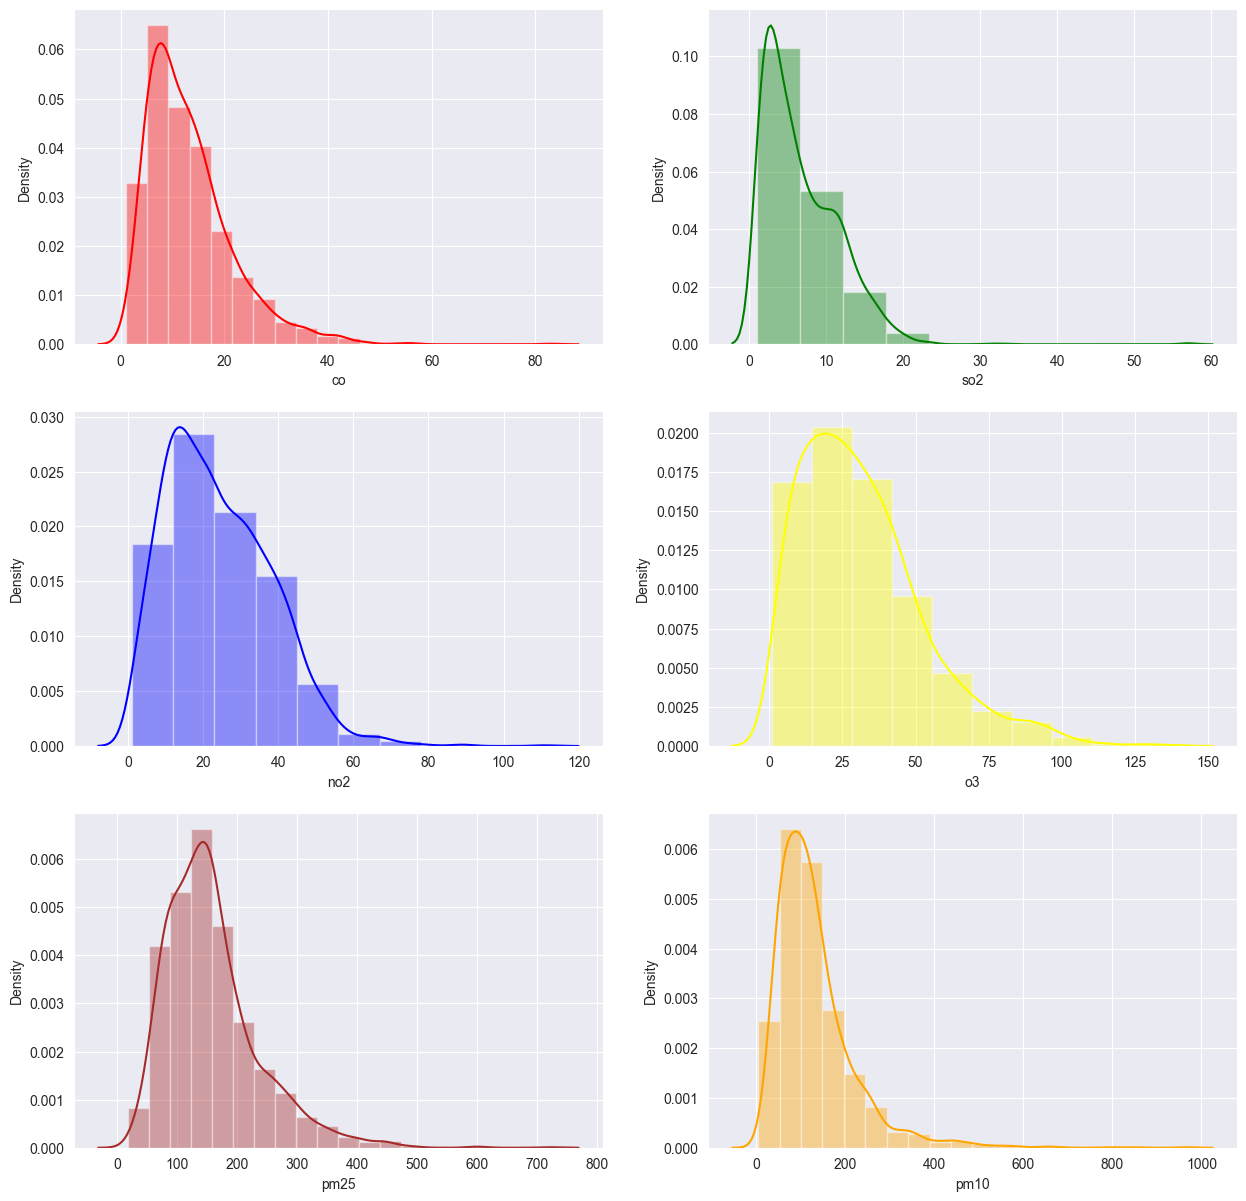

In [7]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(mock_data['co'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(mock_data['so2'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(mock_data['no2'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(mock_data['o3'],bins = 10, color = 'yellow')
plt.subplot(4,2,5)
sns.distplot(mock_data['pm25'],bins = 20,color = 'brown')
plt.subplot(4,2,6)
sns.distplot(mock_data['pm10'],bins = 20,color = 'orange')
plt.show()

In [8]:
# Check missing Values
mock_data.isna().sum()
# Drop missing values
md = mock_data.dropna()
# check missing values after dropping
md.isna().sum()

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
dtype: int64

In [9]:
# descriptive analysis
md.describe(include= "all", datetime_is_numeric=True)

,date,pm25,pm10,o3,no2,so2,co
count,2039,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,2021-01-07 11:09:30.279548928,159.308485,132.295733,32.614026,25.098578,6.871996,13.404610
min,2018-01-23 00:00:00,19.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,2019-07-16 12:00:00,105.000000,74.000000,17.000000,14.000000,3.000000,8.000000
50%,2021-01-10 00:00:00,147.000000,113.000000,29.000000,23.000000,6.000000,12.000000
75%,2022-06-17 12:00:00,194.000000,163.000000,44.000000,34.000000,10.000000,17.000000
max,2024-04-15 00:00:00,719.000000,967.000000,138.000000,111.000000,57.000000,56.000000
std,NaN,77.655315,88.758752,21.384962,13.558748,4.878584,8.101878


In [16]:
# Breakpoints for pollutant AQI calculation
pm10_breakpoints = {
    'c_low': [0, 50, 101, 251, 351, 431, 501, 601],
    'c_high': [50, 100, 250, 350, 430, 500, 600, 999.0],
    'aqi_low': [0, 51, 101, 201, 301, 401, 501, 601],
    'aqi_high': [50, 100, 200, 300, 400, 500, 600, 999]
}

# AQI calculation function for PM10
def calculate_aqi_pm10(value):
    for i in range(len(pm10_breakpoints['c_low'])):
        if pm10_breakpoints['c_low'][i] <= value <= pm10_breakpoints['c_high'][i]:
            c_low = pm10_breakpoints['c_low'][i]
            c_high = pm10_breakpoints['c_high'][i]
            aqi_low = pm10_breakpoints['aqi_low'][i]
            aqi_high = pm10_breakpoints['aqi_high'][i]
            break
        
            
    aqi_pm10 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_pm10))

# Create a new column 'aqi_pm10' and apply the AQI calculation function
md['aqi_pm10'] = md['pm10'].apply(calculate_aqi_pm10)

In [17]:
no2_breakpoints = {
    'c_low_no2': [0, 41, 81, 181, 281, 401],
    'c_high_no2': [40, 80, 180, 280, 400, 500],
    'aqi_low_no2': [0, 51, 101, 201, 301, 401],
    'aqi_high_no2': [50, 100, 200, 300, 400, 500]
}
# AQI calculation function for PM10
def calculate_aqi_no2(value):
    for i in range(len(no2_breakpoints['c_low_no2'])):
        if no2_breakpoints['c_low_no2'][i] <= value <= no2_breakpoints['c_high_no2'][i]:
            c_low_no2 = no2_breakpoints['c_low_no2'][i]
            c_high_no2 = no2_breakpoints['c_high_no2'][i]
            aqi_low_no2 = no2_breakpoints['aqi_low_no2'][i]
            aqi_high_no2 = no2_breakpoints['aqi_high_no2'][i]
            break

    aqi_no2 = (aqi_high_no2 - aqi_low_no2) / (c_high_no2 - c_low_no2) * (value - c_low_no2) + aqi_low_no2
    return int(round(aqi_no2))

# Create a new column 'aqi_pm10' and apply the AQI calculation function
md['aqi_no2'] = md['no2'].apply(calculate_aqi_no2)

In [26]:
pm25_breakpoints = {
    'c_low_pm25': [0, 31, 61, 91, 121, 251, 351, 501, 601, 751],
    'c_high_pm25': [30, 60, 90, 120, 250, 350, 500, 600, 750, 1200],
    'aqi_low_pm25': [0, 51, 101, 201, 301, 401, 501, 601, 751],
    'aqi_high_pm25': [50, 100, 200, 300, 400, 500, 600, 750, 1200]
}

# AQI calculation function for PM10
def calculate_aqi_pm25(value):
    for i in range(len(pm25_breakpoints['c_low_pm25'])):
        if pm25_breakpoints['c_low_pm25'][i] <= value <= pm25_breakpoints['c_high_pm25'][i]:
            c_low_pm25 = pm25_breakpoints['c_low_pm25'][i]
            c_high_pm25 = pm25_breakpoints['c_high_pm25'][i]
            aqi_low_pm25 = pm25_breakpoints['aqi_low_pm25'][i]
            aqi_high_pm25 = pm25_breakpoints['aqi_high_pm25'][i]
            break

    aqi_pm25 = (aqi_high_pm25 - aqi_low_pm25) / (c_high_pm25 - c_low_pm25) * (value - c_low_pm25) + aqi_low_pm25
    return int(round(aqi_pm25))


# Create a new column 'aqi_pm10' and apply the AQI calculation function
md['aqi_pm25'] = md['pm25'].apply(calculate_aqi_pm25)

In [19]:
# Breakpoints for O3 AQI calculation
o3_breakpoints = {
    'c_low': [0, 51, 101, 169, 209, 748, 1009, 1259],
    'c_high': [50, 100, 168, 208, 748, 1008, 1258, 999.0],
    'aqi_low': [0, 51, 101, 201, 301, 401, 501, 601],
    'aqi_high': [50, 100, 200, 300, 400, 500, 600, 999]
}

# AQI calculation function for O3
def calculate_aqi_o3(value):
    for i in range(len(o3_breakpoints['c_low'])):
        if o3_breakpoints['c_low'][i] <= value <= o3_breakpoints['c_high'][i]:
            c_low = o3_breakpoints['c_low'][i]
            c_high = o3_breakpoints['c_high'][i]
            aqi_low = o3_breakpoints['aqi_low'][i]
            aqi_high = o3_breakpoints['aqi_high'][i]
            break

    aqi_o3 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_o3))

# Example usage:
md['aqi_o3'] = md['o3'].apply(calculate_aqi_o3)

In [22]:
# Breakpoints for SO2 AQI calculation (Indian Standards)
so2_breakpoints = {
    'c_low': [0, 41, 81, 381, 801, 1601],
    'c_high': [40, 80, 380, 800, 1600, 2000],
    'aqi_low': [0, 51, 101, 201, 301, 401],
    'aqi_high': [50, 100, 200, 300, 400, 500]
}

# AQI calculation function for SO2 (Indian Standards)
def calculate_aqi_so2(value):
    for i in range(len(so2_breakpoints['c_low'])):
        if so2_breakpoints['c_low'][i] <= value <= so2_breakpoints['c_high'][i]:
            c_low = so2_breakpoints['c_low'][i]
            c_high = so2_breakpoints['c_high'][i]
            aqi_low = so2_breakpoints['aqi_low'][i]
            aqi_high = so2_breakpoints['aqi_high'][i]
            break

    aqi_so2 = (aqi_high - aqi_low) / (c_high - c_low) * (value - c_low) + aqi_low
    return int(round(aqi_so2))

# Example usage:
md['aqi_so2'] = md['so2'].apply(calculate_aqi_so2)

In [23]:
# Breakpoints for CO AQI calculation
co_breakpoints = {
    'c_low_co': [0, 1.1, 2.1, 10, 17, 34],
    'c_high_co': [1.0, 2.0, 10, 17, 34, 68],
    'aqi_low_co': [0, 51, 101, 201, 301, 401],
    'aqi_high_co': [50, 100, 200, 300, 400, 500]
}

# AQI calculation function for CO
def calculate_aqi_co(value):
    for i in range(len(co_breakpoints['c_low_co'])):
        if co_breakpoints['c_low_co'][i] <= value <= co_breakpoints['c_high_co'][i]:
            c_low_co = co_breakpoints['c_low_co'][i]
            c_high_co = co_breakpoints['c_high_co'][i]
            aqi_low_co = co_breakpoints['aqi_low_co'][i]
            aqi_high_co = co_breakpoints['aqi_high_co'][i]
            break

    aqi_co = (aqi_high_co - aqi_low_co) / (c_high_co - c_low_co) * (value - c_low_co) + aqi_low_co
    return int(round(aqi_co))

# Example usage:
md['aqi_co'] = md['co'].apply(calculate_aqi_co)

In [27]:
md

,date,pm25,pm10,o3,no2,so2,co,aqi_pm10,aqi_no2,aqi_o3,aqi_so2,aqi_co,aqi_pm25
0,2024-04-02,90.0,79.0,26.0,1.0,1.0,4.0,79,1,26,1,125,200
1,2024-04-03,92.0,99.0,35.0,3.0,2.0,9.0,99,4,35,2,187,204
2,2024-04-04,109.0,99.0,32.0,3.0,2.0,8.0,99,4,32,2,175,262
3,2024-04-05,100.0,101.0,22.0,2.0,2.0,6.0,101,2,22,2,150,232
4,2024-04-06,108.0,92.0,31.0,2.0,1.0,5.0,92,2,31,1,137,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,2018-03-28,134.0,186.0,37.0,46.0,13.0,20.0,157,57,37,16,318,311
2168,2018-03-29,152.0,190.0,51.0,36.0,9.0,18.0,160,45,51,11,307,325
2169,2018-03-30,151.0,147.0,56.0,30.0,15.0,9.0,132,38,56,19,187,324
2170,2018-03-31,160.0,158.0,51.0,41.0,14.0,10.0,139,51,51,18,200,331


In [28]:
poll = ['pm10', 'pm25', 'no2', 'o3', 'co', 'so2']
# Create a new column 'max_aqi' to store the overall maximum AQI for each row
md['AQI'] = md[[f'aqi_{pollutant}' for pollutant in poll]].max(axis=1)


# Categorize the overall AQI into a new column 'AQI_category'
def categorize_aqi(overall_aqi):
    if overall_aqi <= 50:
        return "Good"
    elif 51 <= overall_aqi <= 100:
        return "Satisfactory"
    elif 101 <= overall_aqi <= 200:
        return "Moderate"
    elif 201 <= overall_aqi <= 300:
        return "Poor"
    elif 301 <= overall_aqi <= 400:
        return "Very Poor"
    elif overall_aqi >= 401:
        return "Severe"


# Apply the categorization function to create the 'AQI_category' column
md['AQI_Category'] = md['AQI'].apply(categorize_aqi)

In [29]:
md

,date,pm25,pm10,o3,no2,so2,co,aqi_pm10,aqi_no2,aqi_o3,aqi_so2,aqi_co,aqi_pm25,AQI,AQI_Category
0,2024-04-02,90.0,79.0,26.0,1.0,1.0,4.0,79,1,26,1,125,200,200,Moderate
1,2024-04-03,92.0,99.0,35.0,3.0,2.0,9.0,99,4,35,2,187,204,204,Poor
2,2024-04-04,109.0,99.0,32.0,3.0,2.0,8.0,99,4,32,2,175,262,262,Poor
3,2024-04-05,100.0,101.0,22.0,2.0,2.0,6.0,101,2,22,2,150,232,232,Poor
4,2024-04-06,108.0,92.0,31.0,2.0,1.0,5.0,92,2,31,1,137,259,259,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,2018-03-28,134.0,186.0,37.0,46.0,13.0,20.0,157,57,37,16,318,311,318,Very Poor
2168,2018-03-29,152.0,190.0,51.0,36.0,9.0,18.0,160,45,51,11,307,325,325,Very Poor
2169,2018-03-30,151.0,147.0,56.0,30.0,15.0,9.0,132,38,56,19,187,324,324,Very Poor
2170,2018-03-31,160.0,158.0,51.0,41.0,14.0,10.0,139,51,51,18,200,331,331,Very Poor


In [30]:
# check unique values in AQI_category
md['AQI_Category'].value_counts()

Very Poor       1108
Poor             391
Severe           278
Moderate         257
Satisfactory       5
Name: AQI_Category, dtype: int64

In [35]:
md_new = md.copy()

In [36]:
# drop columns
md_new.drop(['date', 'AQI', 'pm10', 'aqi_co', 
              'aqi_o3', 'aqi_no2', 'aqi_so2', 'aqi_pm25', 'aqi_pm10' ],inplace=True, axis =1)

In [37]:
# creating instances
ode = OrdinalEncoder()
#scaler = MinMaxScaler()
scaler = PowerTransformer(method='yeo-johnson')
# column transformer
ct = make_column_transformer(
    (ode, ['AQI_Category']),
    (scaler, ['co', 'o3', 'no2', 'so2', 'pm25']),
    remainder='passthrough')

ct.set_output(transform="pandas")
# fit transform
md_new_df = ct.fit_transform(md_new)
# Get original column names
original_columns = ['AQI_Category', 'co', 'o3', 'no2', 'so2', 'pm25']

# Rename the columns in the resulting DataFrame
md_new_df.columns = original_columns
# view dataset
md_new_df

,AQI_Category,co,o3,no2,so2,pm25
0,0.0,-1.553435,-0.118583,-2.581276,-1.872652,-0.963297
1,1.0,-0.415241,0.312202,-2.149567,-1.257584,-0.920290
2,1.0,-0.595801,0.177050,-2.149567,-1.257584,-0.583736
3,1.0,-1.015379,-0.339559,-2.346978,-1.257584,-0.755845
4,1.0,-1.265183,0.130283,-2.346978,-1.872652,-0.602248
...,...,...,...,...,...,...
2167,4.0,0.938480,0.398396,1.418328,1.243349,-0.162343
2168,4.0,0.747154,0.933835,0.851222,0.674060,0.101201
2169,4.0,-0.415241,1.102649,0.473215,1.472981,0.087279
2170,4.0,-0.249481,0.933835,1.143264,1.361730,0.209845


In [ ]:
# feature matrix and target variable
mdX = md_new_df.drop(columns=['AQI_Category'])
mdy = md_new_df['AQI_Category']
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(mdX, mdy, test_size=0.2, random_state=123)